In [402]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor

In [403]:
dt=pd.read_csv('train.csv')

In [404]:
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [405]:
dt['FamilySize'] = dt['SibSp'] + dt['Parch']

In [406]:
dt.drop(['PassengerId','Name','SibSp','Parch','Ticket'],axis=1,inplace=True)

In [407]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         714 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       204 non-null    object 
 6   Embarked    889 non-null    object 
 7   FamilySize  891 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [408]:
dt['Cabin'] = np.where(dt['Cabin'].isnull(), 0, 1)

<Axes: xlabel='Pclass', ylabel='count'>

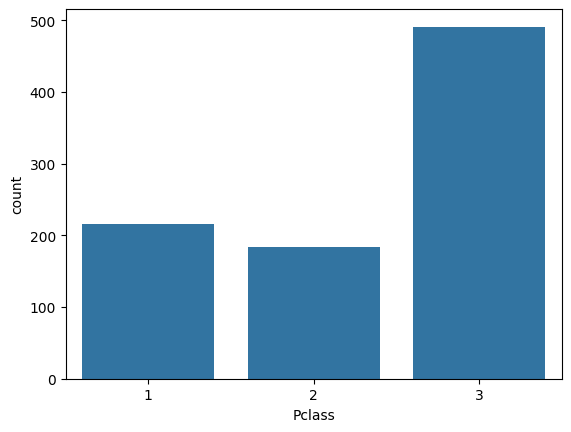

In [409]:
sns.countplot(x='Pclass', data=dt)

<Axes: xlabel='Survived'>

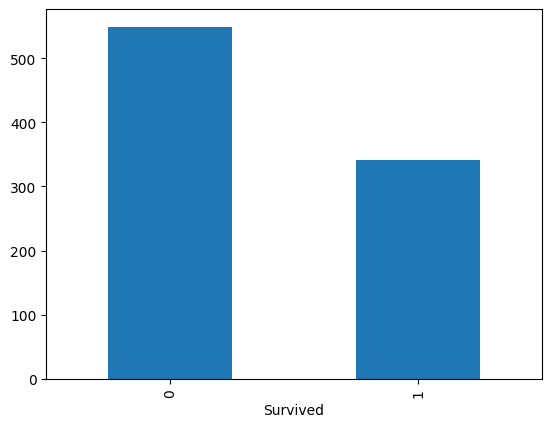

In [410]:
dt['Survived'].value_counts().plot(kind='bar')

<Axes: xlabel='Sex', ylabel='count'>

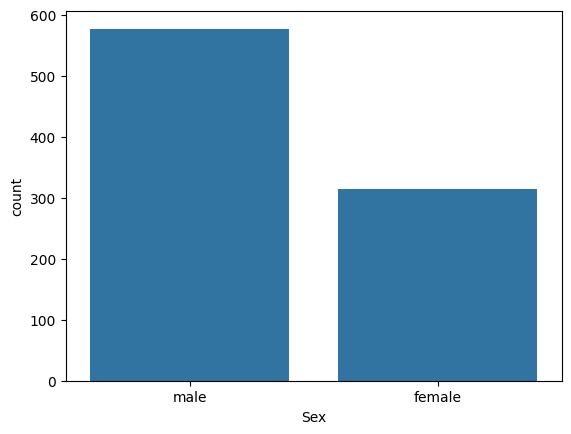

In [411]:
sns.countplot(x='Sex', data=dt)

<Axes: xlabel='Embarked', ylabel='count'>

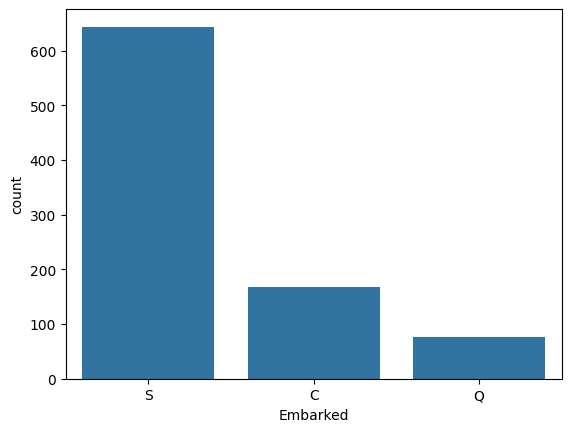

In [412]:
sns.countplot(x='Embarked', data=dt)

<Axes: ylabel='count'>

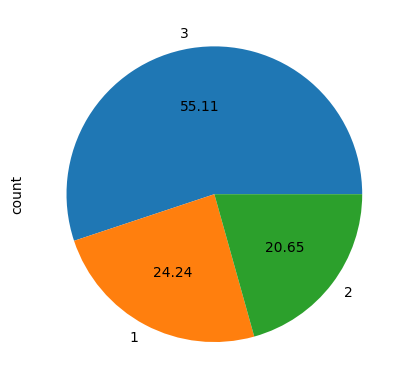

In [413]:
dt['Pclass'].value_counts().plot(kind='pie', autopct='%.2f')

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

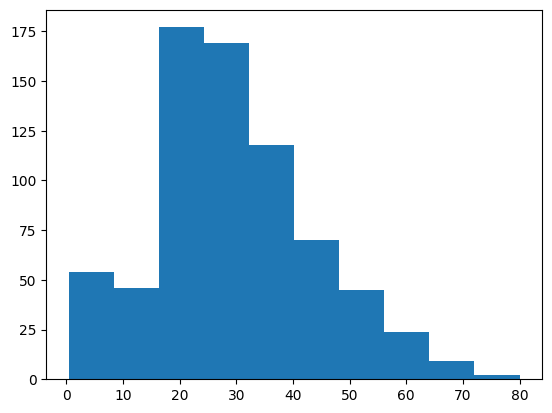

In [414]:
plt.hist(dt['Age'],bins=10)

/tmp/ipython-input-415-3056829263.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt['Age'])


<Axes: xlabel='Age', ylabel='Density'>

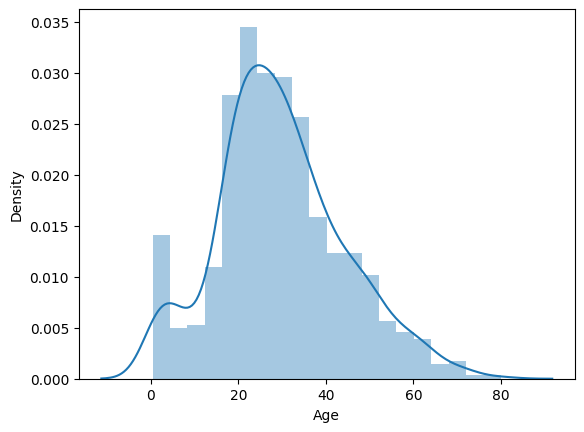

In [415]:
sns.distplot(dt['Age'])

<Axes: ylabel='Age'>

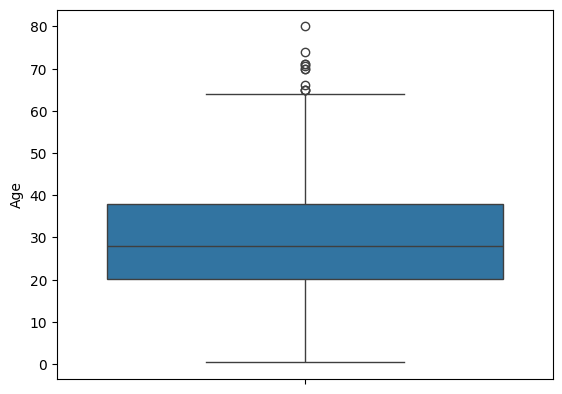

In [416]:
sns.boxplot(dt['Age'])

<Axes: ylabel='Fare'>

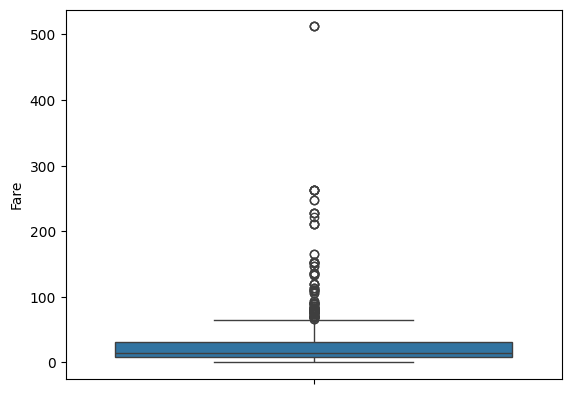

In [417]:
sns.boxplot(dt['Fare'])

In [418]:
dt['Age'].min()

0.42

In [419]:
dt['Age'].median()

28.0

In [420]:
dt['Fare'].median()

14.4542

In [421]:
dt['Age'].skew()

np.float64(0.38910778230082704)

In [422]:
dt['Fare'].skew()

np.float64(4.787316519674893)

<Axes: xlabel='Pclass', ylabel='Age'>

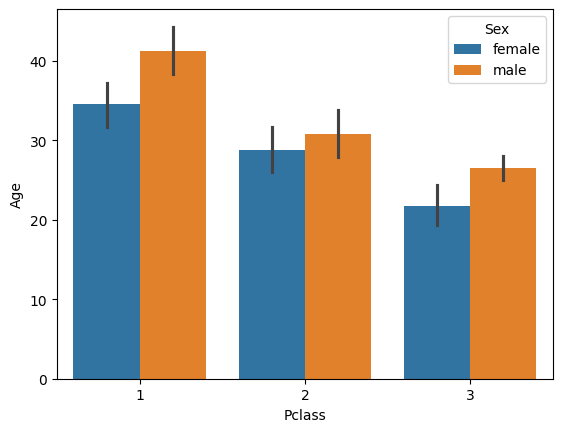

In [423]:
sns.barplot(x=dt['Pclass'], y=dt['Age'],hue=dt['Sex'])

<Axes: xlabel='Pclass', ylabel='Fare'>

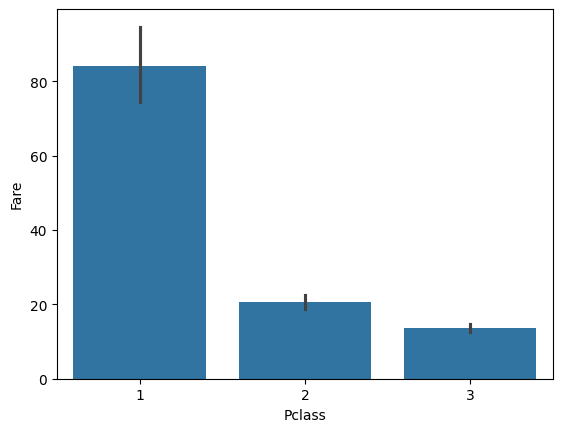

In [424]:
sns.barplot(x=dt['Pclass'],y=dt['Fare'])

<Axes: xlabel='Sex', ylabel='Age'>

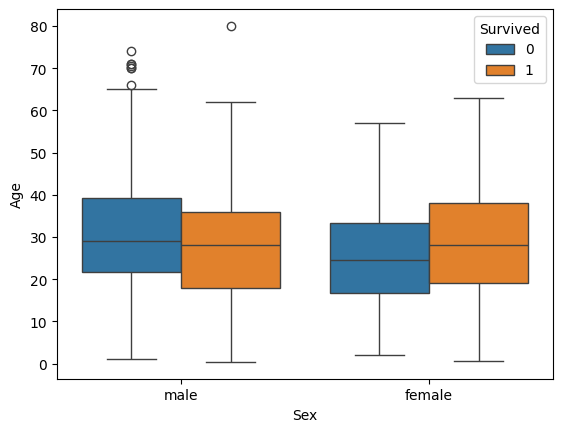

In [425]:
sns.boxplot(x=dt['Sex'],y=dt['Age'],hue=dt['Survived'])

/tmp/ipython-input-426-2302880085.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt[dt['Survived']==0]['Age'],hist=False)
/tmp/ipython-input-426-2302880085.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt[dt['Survived']==1]['Age'],hist=False)


<Axes: xlabel='Age', ylabel='Density'>

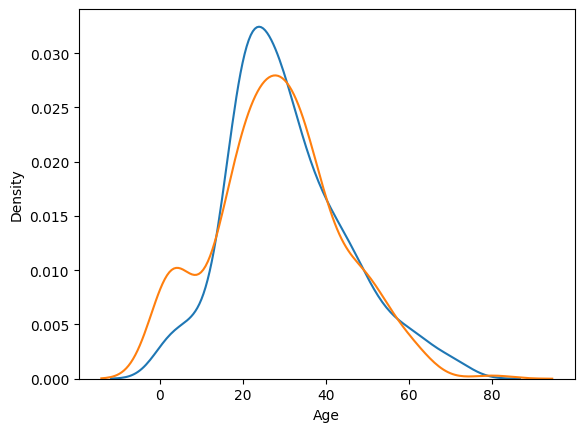

In [426]:
sns.distplot(dt[dt['Survived']==0]['Age'],hist=False)
sns.distplot(dt[dt['Survived']==1]['Age'],hist=False)

<Axes: xlabel='Survived', ylabel='Pclass'>

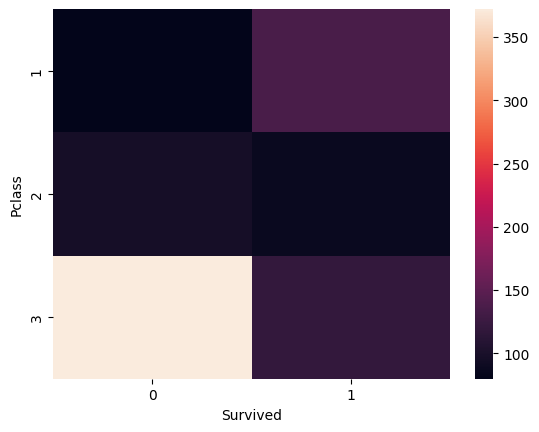

In [427]:
sns.heatmap(pd.crosstab(dt['Pclass'],dt['Survived']))

In [428]:
dt.groupby('Pclass')['Survived'].mean()*100


,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253


In [429]:
dt.groupby('Sex')['Survived'].mean()*100

,Survived
Sex,
female,74.203822
male,18.890815


In [430]:
dt.groupby('Embarked')['Survived'].mean()*100

,Survived
Embarked,
C,55.357143
Q,38.961039
S,33.695652


<Axes: xlabel='Pclass'>

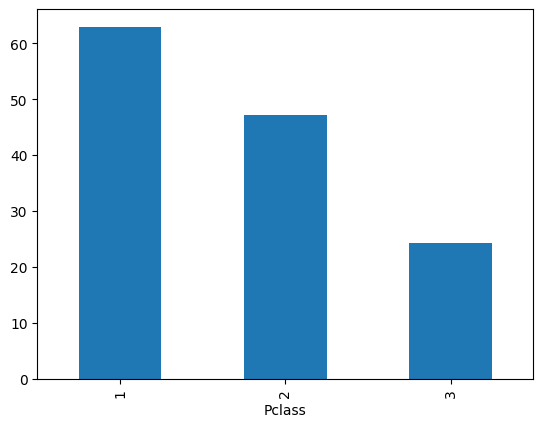

In [431]:
(dt.groupby('Pclass')['Survived'].mean()*100).plot(kind='bar')

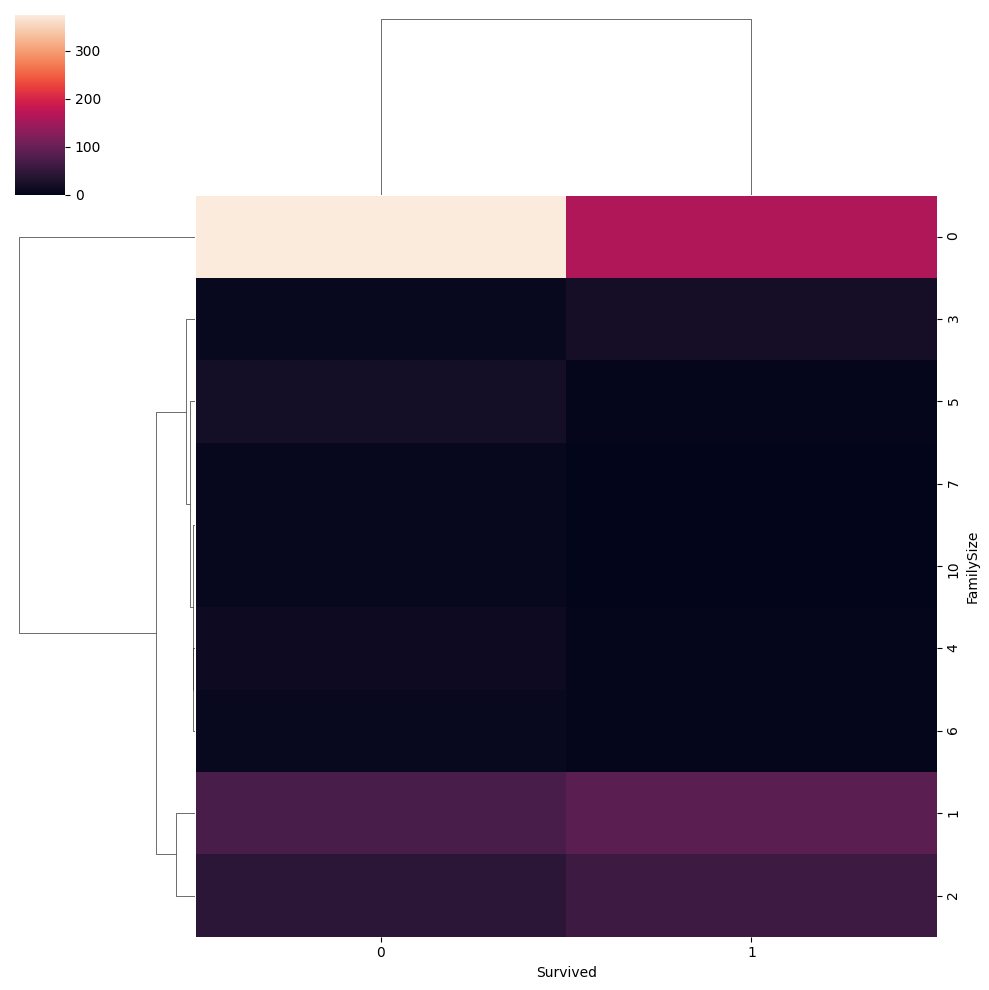

In [432]:
sns.clustermap(pd.crosstab(dt['FamilySize'],dt['Survived']))

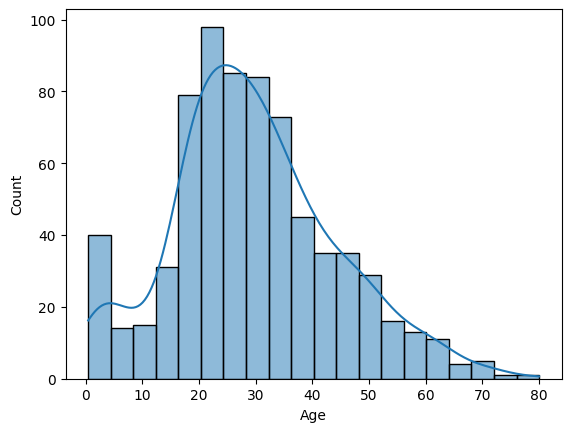

In [433]:
sns.histplot(dt['Age'], kde=True)
plt.show()

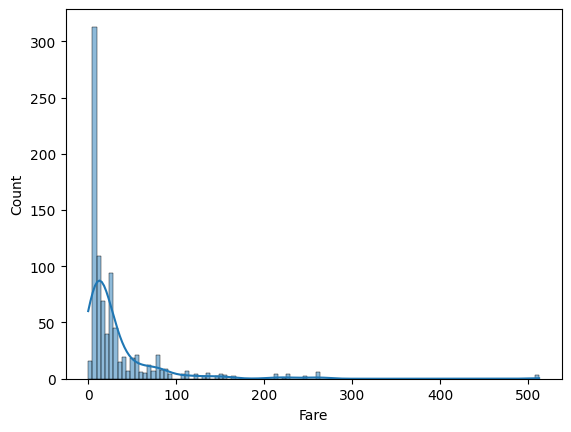

In [434]:
sns.histplot(dt['Fare'], kde=True)
plt.show()

In [435]:
dt['Fare'] = np.log(dt['Fare'] + 1)

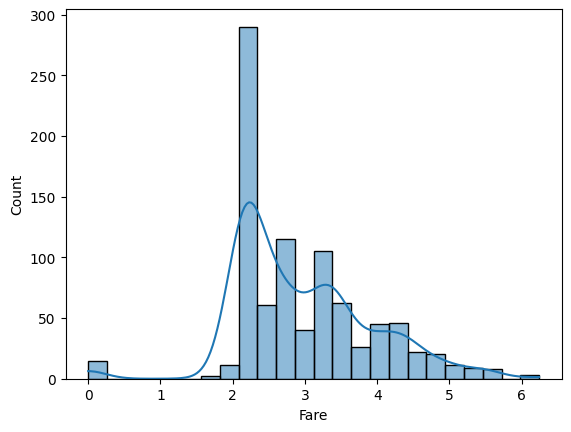

In [436]:
sns.histplot(dt['Fare'], kde=True)
plt.show()

In [437]:
# sns.pairplot(dt,hue='Embarked')

In [438]:
# pip install ydata-profiling

In [439]:
# from ydata_profiling import ProfileReport

# prof = ProfileReport(dt)
# prof.to_file("output.html")


In [440]:
X_train,X_test,Y_train,Y_test=train_test_split(dt.drop(columns=['Survived']),dt['Survived'],test_size=0.2,random_state=42);

In [441]:
X_train.head(2)

,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize
331,1,male,45.5,3.384390,1,S,0
733,2,male,23.0,2.639057,0,S,0


In [442]:
Y_train.head(2)

,Survived
331,0
733,0


In [443]:
trf1=make_column_transformer(
    (SimpleImputer(),[2]),
    (SimpleImputer(strategy='most_frequent'),[6])
,remainder='passthrough')

In [444]:
trf2 = make_column_transformer(
    (OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), [1, 6]),
    remainder='passthrough'
)

In [445]:
trf3=make_column_transformer(
    (StandardScaler(),slice(0,9))
)

In [446]:
trf4=DecisionTreeRegressor(max_depth=5, random_state=42)

In [447]:
pipe=make_pipeline(trf1,trf2,trf3,trf4)

In [448]:
pipe.fit(X_train,Y_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('simpleimputer-1',
                                                  SimpleImputer(), [2]),
                                                 ('simpleimputer-2',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 6])])),
                ('columntransformer-3',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  slice(0, 9, None))])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=5, random_state=42))])

In [449]:
from sklearn import set_config
set_config(display='diagram')

In [450]:
Y_pred=pipe.predict(X_test)
Y_pred

array([0.56756757, 0.29764454, 0.29764454, 0.5210084 , 0.5210084 ,
       0.29764454, 0.29764454, 0.56756757, 0.29764454, 0.56756757,
       0.5210084 , 0.29764454, 0.29764454, 0.29764454, 0.29764454,
       0.5210084 , 0.5210084 , 0.29764454, 0.29764454, 0.29764454,
       0.29764454, 0.29764454, 0.5210084 , 0.29764454, 0.29764454,
       0.29764454, 0.29764454, 0.29764454, 0.29764454, 0.29764454,
       0.29764454, 0.29764454, 0.29764454, 0.29764454, 0.29764454,
       0.5210084 , 0.29764454, 0.29764454, 0.29764454, 0.29764454,
       0.56756757, 0.5210084 , 0.29764454, 0.29764454, 0.5210084 ,
       0.29764454, 0.29764454, 0.29764454, 0.29764454, 0.56756757,
       0.73076923, 0.56756757, 0.29764454, 0.73076923, 0.29764454,
       0.56756757, 0.29764454, 0.5210084 , 0.29764454, 0.29764454,
       0.29764454, 0.5210084 , 0.5210084 , 0.29764454, 0.29764454,
       0.29764454, 0.29764454, 0.29764454, 0.56756757, 0.5210084 ,
       0.56756757, 0.29764454, 0.29764454, 0.56756757, 0.29764

In [451]:
Y_pred=np.where(Y_pred>0.4,1,0)

In [452]:
accuracy_score(Y_test,Y_pred)

0.7039106145251397

In [453]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))